In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df= pd.read_csv(r'C:\Users\phuaj\Documents\GitHub\CZ-3006-Labs\cz3006lab4\test_SFLow_data.csv', index_col=False,names=['type','flow_agent_addr',
'inputPort','outputPort','src_MAC','dst_MAC','eth_type','in_vlan','out_vlan',
'src_IP','dst_IP','IP_Protocol','ip_tos','ip_ttl','src_port','dst_port',
'tcp_flags','packet_size','IP_size','sampling_rate'])



# Frequency Analysis

## Top 5 Talkers&Listeners, Top Protocols

In [2]:
top5_talkers_ip = df['src_IP'].value_counts()[:5]
top5_listeners_ip = df['dst_IP'].value_counts()[:5]

tcp_count = df['IP_Protocol'].value_counts().get(6)
udp_count = df['IP_Protocol'].value_counts().get(17)
top3_IP_Protocols = df['IP_Protocol'].value_counts()[:3]

top5_apps_protocol = df['dst_port'].value_counts()[:5]

total_traffic = df['IP_size'].sum()

print('Top 5 Talkers (IP):')
print(top5_talkers_ip)
print('\n')
   
print('Top 5 Listeners (IP):')
print(top5_listeners_ip)
print('\n')

print('Top 3 IP Protocols:')
print(top3_IP_Protocols)
print('\n')

print('Top 5 Application Protocols:')
print(top5_apps_protocol)
print('\n')

print('Total traffic: {} bytes\n'.format(total_traffic))

Top 5 Talkers (IP):
152.3.219.19       126
207.241.228.157     66
130.14.250.13       63
193.62.192.8        46
192.122.131.36      40
Name: src_IP, dtype: int64


Top 5 Listeners (IP):
198.71.44.98      126
103.37.198.100     98
210.48.222.9       66
137.132.228.15     50
202.21.159.244     38
Name: dst_IP, dtype: int64


Top 3 IP Protocols:
6     879
50    140
17    135
Name: IP_Protocol, dtype: int64


Top 5 Application Protocols:
443      234
0         82
56152     82
43930     45
80        37
Name: dst_port, dtype: int64


Total traffic: 1079883 bytes



## Top 5 Communication Pairs

In [3]:
print('Additional stats:\n')

pairs={}
for index, row in df.iterrows():
    word1 = row['src_IP']+'/'+row['dst_IP']
    word2 = row['dst_IP']+'/'+row['src_IP']
    if word1 in pairs.keys():
        pairs[word1]+=1
    elif word2 in pairs.keys():
        pairs[word2]+=1
    else:
        pairs[word1]=1

pairs_sorted = sorted([(k,v) for k,v in pairs.items()], key= lambda x: x[1], reverse=True)

print('Top 5 communication pairs:\n{}\n'.format(pairs_sorted[:5]))

Additional stats:

Top 5 communication pairs:
[('152.3.219.19/198.71.44.98', 137), ('193.62.192.8/137.132.228.15', 81), ('207.241.228.157/210.48.222.9', 79), ('103.37.198.100/130.14.250.13', 70), ('216.58.203.234/192.122.131.36', 47)]



## Network Visualization

Network visualised:



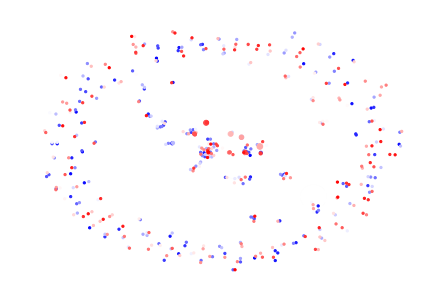

In [4]:
G = nx.Graph()
nodes = list(set(df['src_IP'].tolist()+df['dst_IP'].tolist())) #creating nodes
G.add_nodes_from(nodes)
for (p,n) in pairs_sorted:
    G.add_edge(p.split('/')[0], p.split('/')[1], weight=n)
size = []
for node in nodes:
    if G.degree(node, weight='weight')<25:
        #color.append('g')
        size.append(5)
    elif G.degree(node, weight='weight')<50:
        #color.append('b')
        size.append(10)
    elif G.degree(node, weight='weight')<75:
        #color.append('c')
        size.append(15)
    elif G.degree(node, weight='weight')<100:
        #color.append('y')
        size.append(20)
    elif G.degree(node, weight='weight')<125:
        #color.append('m')
        size.append(25)
    else:
        #color.append('r')
        size.append(30)
edges = G.edges()
weights = [G[u][v]['weight']/500 for u,v in edges]
print('Network visualised:\n')
nx.draw_spring(G, node_size=size, node_color=range(len(nodes)), width=weights, cmap=plt.cm.bwr)


# Geospatial visualization

In [5]:
df1 = df.loc[:, ('src_IP','dst_IP')]
df1.head()

,src_IP,dst_IP
0,152.3.219.19,198.71.44.98
1,152.3.219.19,198.71.44.98
2,152.3.219.19,198.71.44.98
3,152.3.219.19,198.71.44.98
4,152.3.219.19,198.71.44.98


In [6]:
import requests
import ipaddress
ips = list(set(df1['src_IP'].tolist()+df1['dst_IP'].tolist()))
print(len(ips))
valid_ips = []
for ip in ips:
    try:
        ipaddress.ip_address(ip)
        valid_ips.append(ip)
    except:
        pass
print(len(valid_ips))

428
379


## Batch ip-geoloaction lookup via ip-api.com

In [7]:
res = requests.post("http://ip-api.com/batch",json=valid_ips[:100]).json()
res = pd.DataFrame(res)

In [8]:
d={}
for index, row in res.iterrows():
    d[res.at[index,'query']] = [res.at[index,'lat'],res.at[index,'lon']]

In [9]:
res = requests.post("http://ip-api.com/batch",json=valid_ips[100:200]).json()
res = pd.DataFrame(res)

In [10]:
for index, row in res.iterrows():
    d[res.at[index,'query']] = [res.at[index,'lat'],res.at[index,'lon']]

In [11]:
res = requests.post("http://ip-api.com/batch",json=valid_ips[200:300]).json()
res = pd.DataFrame(res)

In [12]:
for index, row in res.iterrows():
    d[res.at[index,'query']] = [res.at[index,'lat'],res.at[index,'lon']]

In [13]:
res = requests.post("http://ip-api.com/batch",json=valid_ips[300:]).json()
res = pd.DataFrame(res)

In [14]:
for index, row in res.iterrows():
    d[res.at[index,'query']] = [res.at[index,'lat'],res.at[index,'lon']]
print(d)

{'131.253.61.100': [43.6532, -79.3832], '155.69.192.193': [1.34712, 103.68], '198.143.39.33': [1.35208, 103.82], '137.132.19.118': [1.29754, 103.772], '123.136.64.58': [1.29961, 103.788], '122.226.56.24': [29.1017, 119.654], '130.14.29.35': [38.8341, -76.7974], '202.6.241.85': [1.38755, 103.844], '123.136.71.68': [1.29961, 103.788], '193.62.192.6': [52.1929, 0.1256], '137.132.3.10': [1.29754, 103.772], '206.87.224.81': [49.2301, -123.0869], '155.69.204.78': [1.34712, 103.68], '202.127.1.76': [39.9042, 116.407], '137.132.46.73': [1.29754, 103.772], '74.125.10.23': [1.35208, 103.82], '216.58.221.78': [1.35208, 103.82], '103.31.35.2': [1.8632, 103.0962], '202.158.196.131': [-35.2298, 149.106], '144.16.111.25': [28.5866, 77.2395], '140.135.5.201': [24.9574, 121.241], '155.230.21.50': [35.8723, 128.5924], '210.119.23.2': [36.3721, 127.36], '172.217.27.3': [1.35208, 103.82], '59.189.9.239': [1.32429, 103.893], '202.120.224.114': [40.0018, 116.333], '54.243.104.69': [39.0438, -77.4874], '155.

In [15]:
ips = d.keys()

df1['src_lat'] = None
df1['src_lng'] = None
df1['dst_lat'] = None
df1['dst_lng'] = None

for index, row in df1.iterrows():
    
    src_ip = df1.at[index,'src_IP']
    if src_ip in ips:
        df1.at[index,'src_lat'] = d[src_ip][0]
        df1.at[index,'src_lng'] = d[src_ip][1]
    
    dst_ip = df1.at[index,'dst_IP']
    if dst_ip in ips:
        df1.at[index,'dst_lat'] = d[dst_ip][0]
        df1.at[index,'dst_lng'] = d[dst_ip][1]

df1.head()

,src_IP,dst_IP,src_lat,src_lng,dst_lat,dst_lng
0,152.3.219.19,198.71.44.98,35.9806,-78.8426,42.2338,-83.7289
1,152.3.219.19,198.71.44.98,35.9806,-78.8426,42.2338,-83.7289
2,152.3.219.19,198.71.44.98,35.9806,-78.8426,42.2338,-83.7289
3,152.3.219.19,198.71.44.98,35.9806,-78.8426,42.2338,-83.7289
4,152.3.219.19,198.71.44.98,35.9806,-78.8426,42.2338,-83.7289


In [16]:
df1=df1.dropna()

## World map from opendatasoft

<AxesSubplot:>

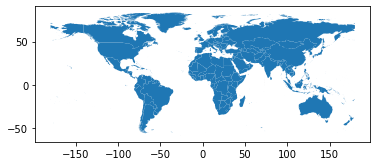

In [17]:
from shapely.geometry import Point, Polygon
import geopandas as gpd

world_map = gpd.read_file(r'C:\Users\phuaj\Documents\GitHub\CZ-3006-Labs\cz3006lab4\world-admin-boundaries\world-administrative-boundaries.shp')
world_map.plot()

<AxesSubplot:>

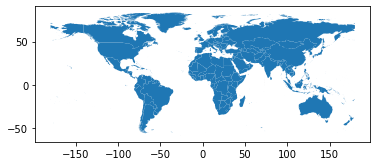

In [18]:
world_map.to_crs(epsg=4326).plot()

## Source IP Geoloaction Visualization

In [19]:
crs = {'init':'EPSG:4326'}
geo_src = [Point(xy) for xy in zip(df1['src_lng'], df1['src_lat'])]
geo_df = gpd.GeoDataFrame(df1, 
                          crs = crs, 
                          geometry = geo_src)

C:\Users\phuaj\anaconda3\envs\tf\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Text(0.5, 1.0, 'Source IP Geolocations')

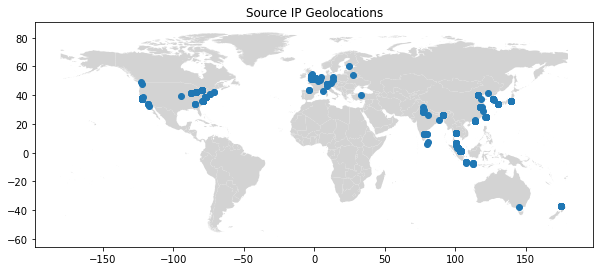

In [21]:
fig, ax = plt.subplots(figsize = (10,10))
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax)
ax.set_title('Source IP Geolocations')

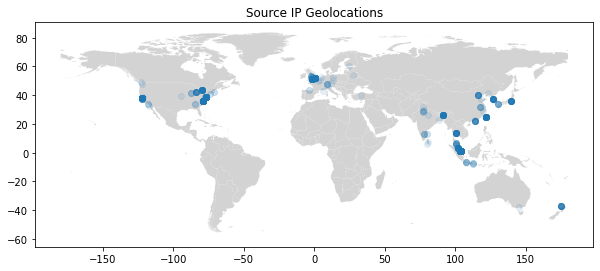

In [22]:
fig, ax = plt.subplots(figsize = (10,10))
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, alpha = .1 )
ax.set_title('Source IP Geolocations')
plt.savefig('Source IP Geolocations')

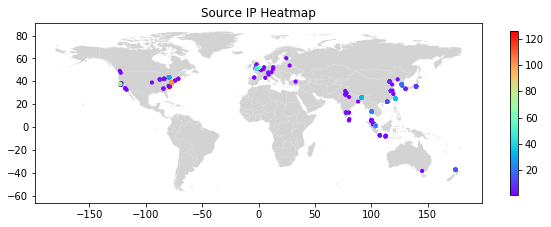

In [28]:
z={}
geo_df['count'] = 0
for index, row in geo_df.iterrows():
    geo = str(geo_df.at[index,'geometry'])
    if geo in z.keys():
        z[geo] = z[geo]+1
    else:
        z[geo] = 1

for index, row in geo_df.iterrows():
    geo = str(geo_df.at[index,'geometry'])
    geo_df.at[index,'count'] = z[geo]

fig, ax = plt.subplots(figsize = (10,10))
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(column = 'count', ax=ax, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Source IP Heatmap')
plt.savefig('Source IP Heat Map')

## Destination IP Geolocation Visualization

In [29]:
crs = {'init':'EPSG:4326'}
geo_dst = [Point(xy) for xy in zip(df1['dst_lng'], df1['dst_lat'])]
geo_df1 = gpd.GeoDataFrame(df1, 
                          crs = crs, 
                          geometry = geo_dst)

C:\Users\phuaj\anaconda3\envs\tf\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Text(0.5, 1.0, 'Destination IP Geolocations')

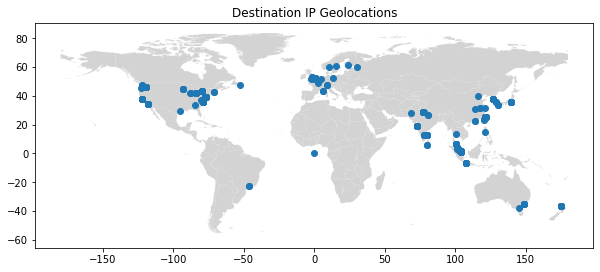

In [30]:
fig, ax = plt.subplots(figsize = (10,10))
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df1.plot(ax=ax)
ax.set_title('Destination IP Geolocations')

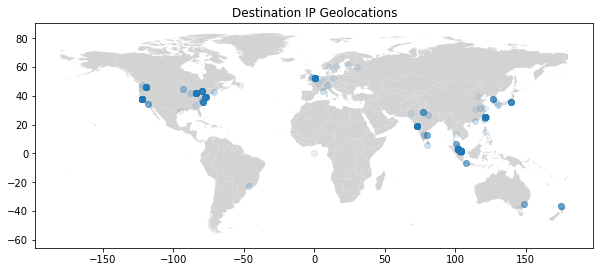

In [31]:
fig, ax = plt.subplots(figsize = (10,10))
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df1.plot(ax=ax, alpha = .1 )
ax.set_title('Destination IP Geolocations')
plt.savefig('Destination IP Geolocations')

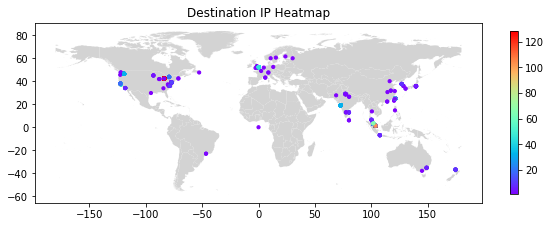

In [32]:
z={}
geo_df1['count'] = 0
for index, row in geo_df1.iterrows():
    geo = str(geo_df1.at[index,'geometry'])
    if geo in z.keys():
        z[geo] = z[geo]+1
    else:
        z[geo] = 1

for index, row in geo_df1.iterrows():
    geo = str(geo_df1.at[index,'geometry'])
    geo_df1.at[index,'count'] = z[geo]

fig, ax = plt.subplots(figsize = (10,10))
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df1.plot(column = 'count', ax=ax, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Destination IP Heatmap')
plt.savefig('Destination IP Heat Map')

## Overall IP Geospatial Visualization

In [36]:
ips = df1['src_IP'].tolist()+df1['dst_IP'].tolist()
lats = df1['src_lat'].tolist()+df1['dst_lat'].tolist()
lngs = df1['src_lng'].tolist()+df1['dst_lng'].tolist()

df2 = pd.DataFrame(
    {'ip': ips,
     'lat': lats,
     'lng': lngs
    })
df2.head()

,ip,lat,lng
0,152.3.219.19,35.9806,-78.8426
1,152.3.219.19,35.9806,-78.8426
2,152.3.219.19,35.9806,-78.8426
3,152.3.219.19,35.9806,-78.8426
4,152.3.219.19,35.9806,-78.8426


In [37]:
crs = {'init':'EPSG:4326'}
geo_dst = [Point(xy) for xy in zip(df2['lng'], df2['lat'])]
geo_df2 = gpd.GeoDataFrame(df2, 
                          crs = crs, 
                          geometry = geo_dst)

C:\Users\phuaj\anaconda3\envs\tf\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Text(0.5, 1.0, 'Overall IP Geolocations')

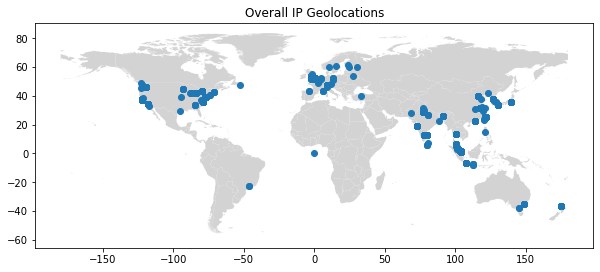

In [38]:
fig, ax = plt.subplots(figsize = (10,10))
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df2.plot(ax=ax)
ax.set_title('Overall IP Geolocations')

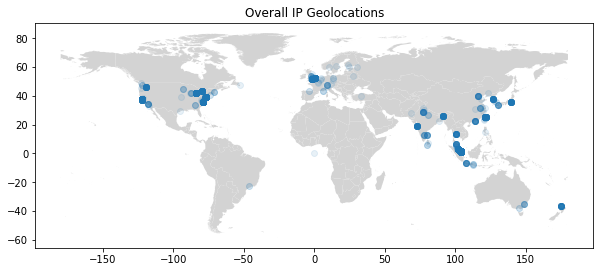

In [39]:
fig, ax = plt.subplots(figsize = (10,10))
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df2.plot(ax=ax, alpha = .1 )
ax.set_title('Overall IP Geolocations')
plt.savefig('Overall IP Geolocations')

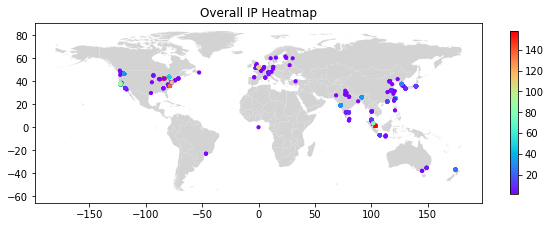

In [40]:
z={}
geo_df2['count'] = 0
for index, row in geo_df2.iterrows():
    geo = str(geo_df2.at[index,'geometry'])
    if geo in z.keys():
        z[geo] = z[geo]+1
    else:
        z[geo] = 1

for index, row in geo_df2.iterrows():
    geo = str(geo_df2.at[index,'geometry'])
    geo_df2.at[index,'count'] = z[geo]

fig, ax = plt.subplots(figsize = (10,10))
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df2.plot(column = 'count', ax=ax, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Overall IP Heatmap')
plt.savefig('Overall IP Heat Map')

## Conclusion
Most traffic from USA, Europe, SEA, Australia